# Portfolio creation tool
You can upload asstes/ stocks of your choice, choose timeframe and investment amount, and the tool will download data from yahoo finance, create portfolio based on three strategies and return recommended wights. I will also provide multiple visualisation and Monte Carlo simulations of future evolution of the portfolio.

##  Data analysis and visualisation part


In [1]:
# Import packages
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import math
import datetime as dt
from datetime import datetime
import yfinance as yf
import seaborn as sns
import functools as reduce
from scipy import optimize

# Import modules
import portfolio_optimization as pto
import EDA

ModuleNotFoundError: No module named 'portfolio_optimization'

## Portfolio Selection Functions

### Processing user input

In [2]:
# Specify the tickers:
user_input_str = input("Enter a list of tickers you want to analyze, separated by a comma only: ")
user_input_list = user_input_str.split(',')

# Remove leading and trailing whitespaces from each string in the list:
tickers = [item.strip() for item in user_input_list]

# Take user input for start date and end date:
start_date_str = input("Enter the start date (YYYY-MM-DD): ")
end_date_str = input("Enter the end date (YYYY-MM-DD): ")

# Convert user input date strings to datetime objects:
start_date = datetime.strptime(start_date_str, "%Y-%m-%d")
end_date = datetime.strptime(end_date_str, "%Y-%m-%d")

# Create the adjusted close price dataframe:
adj_close_df = pd.DataFrame()

# Populate the dataframe with adjusted close price data of specified assets:
for ticker in tickers:
    data = yf.download(ticker, start=start_date, end=end_date, interval="1d")
    adj_close_df[ticker] = data["Adj Close"]
    
# Check for missing values in the dataframe:
if adj_close_df.isnull().values.any():
    print("Warning! Data for requested tickers are not available for the whole period.")
else:
    print("Data downloaded successfully.")

Enter a list of tickers you want to analyze, separated by a comma only: AQN,BEPC,CEG,CSIQ,DQ,GE,IBDRY,JKS,NEE,VWDRY
Enter the start date (YYYY-MM-DD): 2023-01-01
Enter the end date (YYYY-MM-DD): 2024-02-07
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
Data downloaded successfully.


Some examples of stocks:
- Sustainable stocks: AQN,BEPC,CEG,CSIQ,DQ,GE,IBDRY,JKS,NEE,VWDRY
    some of the biggest renewable Energy Companies in the World
  
- Unsustainable stocks: EQNR,BP,0857.HK,COP,FP.VI,SHEL,CVX,SR,ENEL.MI
     some of the largest energy companies that do not focus maily on sustainable resouces
- Tech stocks: AAPL, MSFT, NVDA, TSM, AVGO, ORCL, ADBE, ASML, CSCO, CRM
    top 10 biggest public tech companies by market cap


Shape of the DataFrame: (275, 10)
First 5 rows of the DataFrame:
                 AQN       BEPC        CEG       CSIQ         DQ         GE  \
Date                                                                          
2023-01-03  6.336523  26.985115  80.924309  30.299999  39.950001  66.139229   
2023-01-04  6.458921  27.538755  82.406265  32.189999  38.860001  69.988800   
2023-01-05  6.553075  26.498295  81.418297  31.770000  37.110001  71.075539   
2023-01-06  6.769628  26.908751  82.495171  36.150002  39.759998  71.723572   
2023-01-09  6.863780  27.576935  82.989159  38.570000  39.619999  72.451385   

                IBDRY        JKS        NEE  VWDRY  
Date                                                
2023-01-03  43.763187  39.525295  81.527985   9.44  
2023-01-04  44.214745  40.223759  82.169868   9.10  
2023-01-05  43.734962  38.243187  80.360939   9.16  
2023-01-06  44.444630  44.194462  81.352928   9.53  
2023-01-09  44.339420  46.997879  81.761398   9.63  
DataFrame 

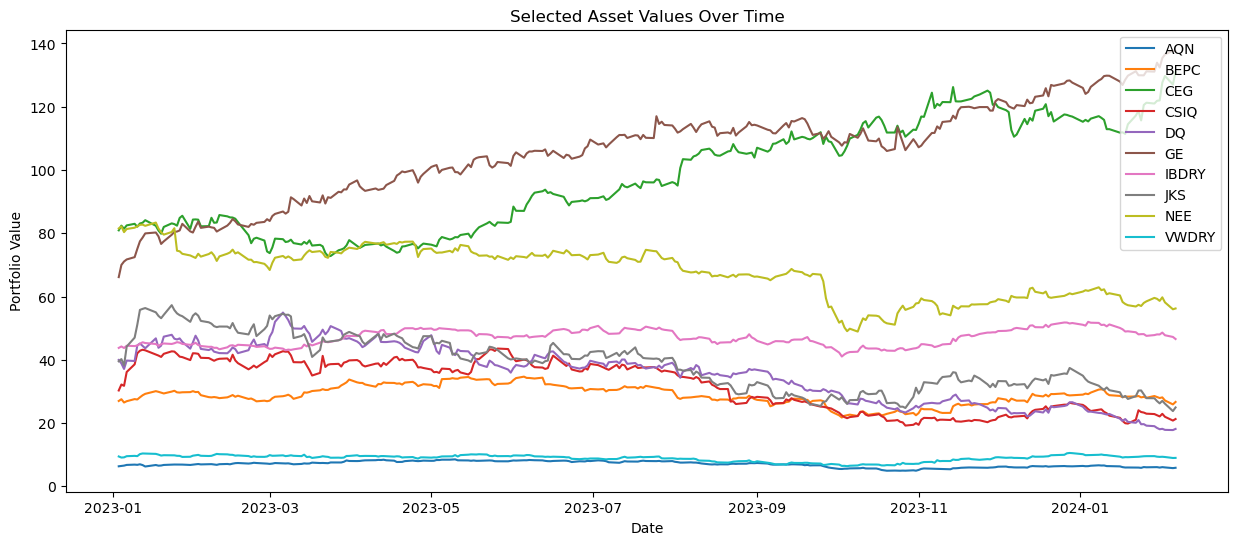

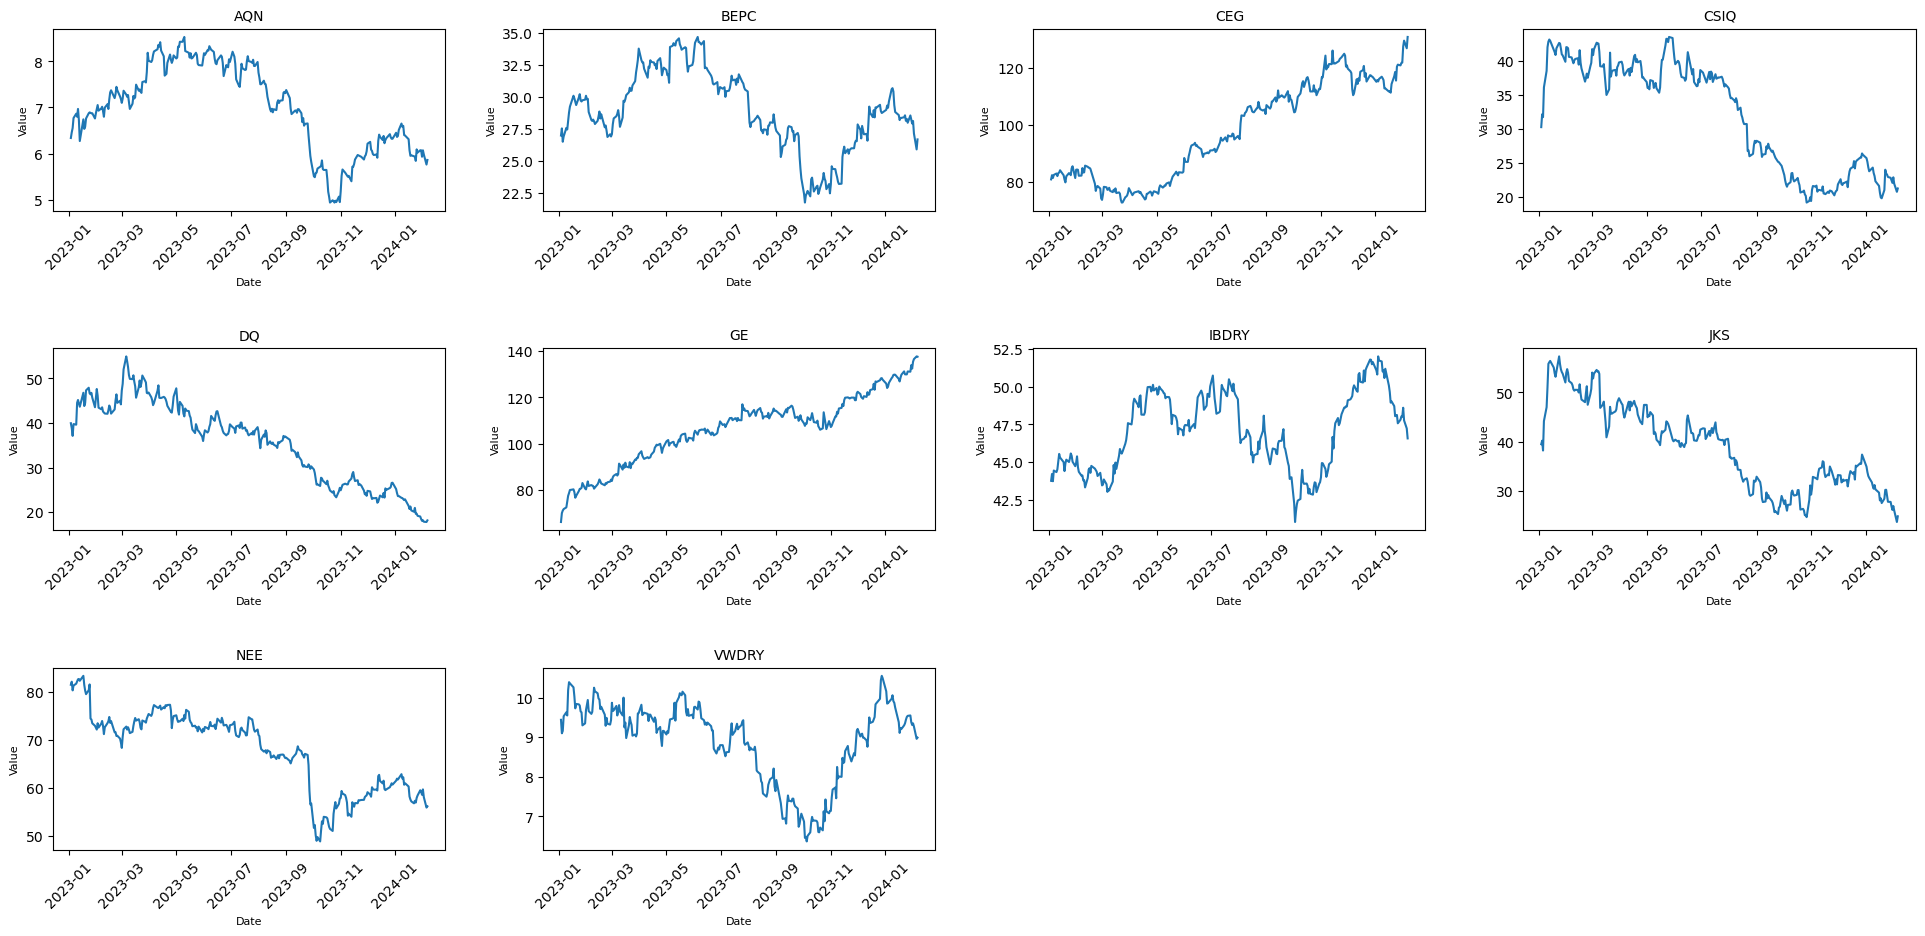

Box plot for distribution analysis


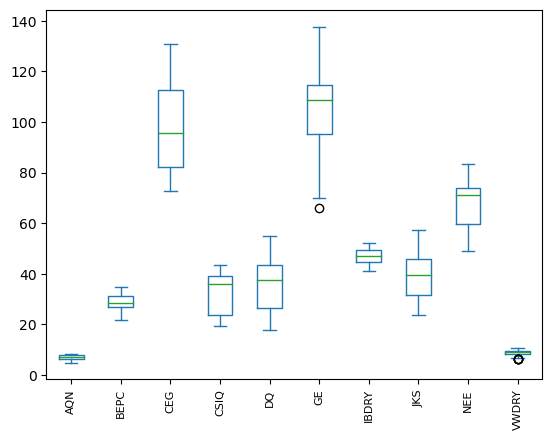

Heatmap for Correlation Between Assets


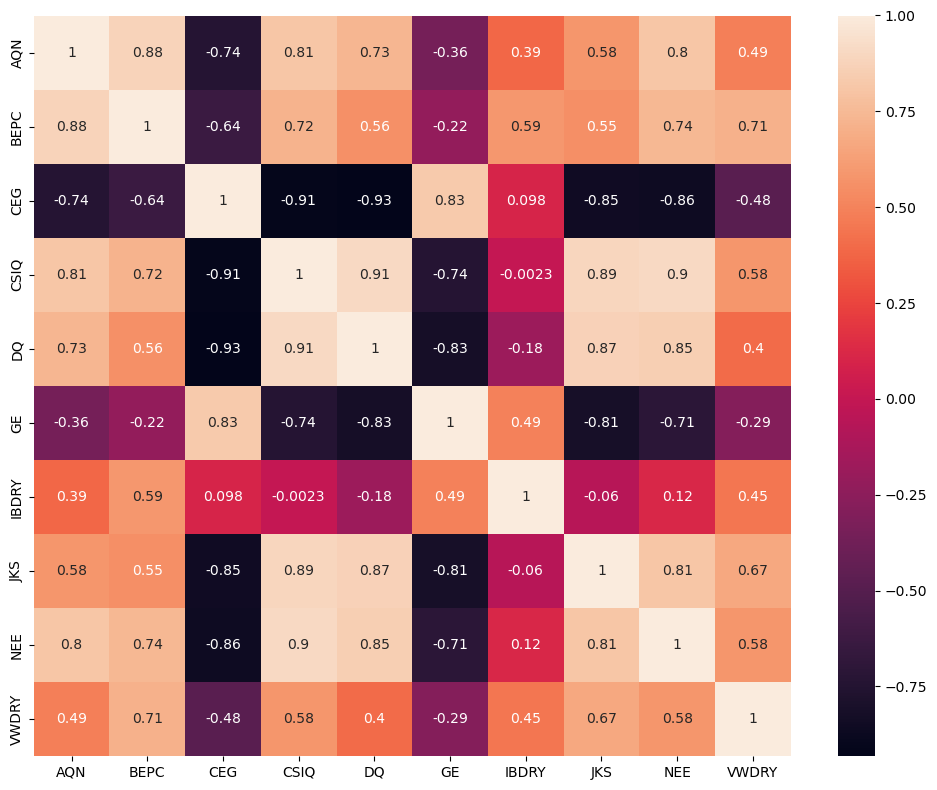

In [3]:
# Initial Analysis of the data
EDA.analyze_dataset(adj_close_df, summary_stat= True, data_quality = True, exploratory_analysis= True)

## Portfolio analysis

In this section, please insert the amount you want ton invest and press enter. The tool will use three different strategies how to build portfolio and graph the different combinations. 

In [4]:
invested_amount = float(input("Enter amount to invest in USD and press enter: "))

Enter amount to invest in USD: 100000


#### Optimal weights of assets

Maxmimum Expected Return Method:
Expected Annual Return: 0.2237
Expected Volatility: 0.1880
Sharpe Ratio: 1.2966
Minimum Variance Method:
Expected Annual Return: 0.1338
Expected Volatility: 0.1690
Sharpe Ratio: 0.9099
Maximum Sharpe Ratio Method:
Expected Annual Return: 0.2205
Expected Volatility: 0.1786
Sharpe Ratio: 1.3462


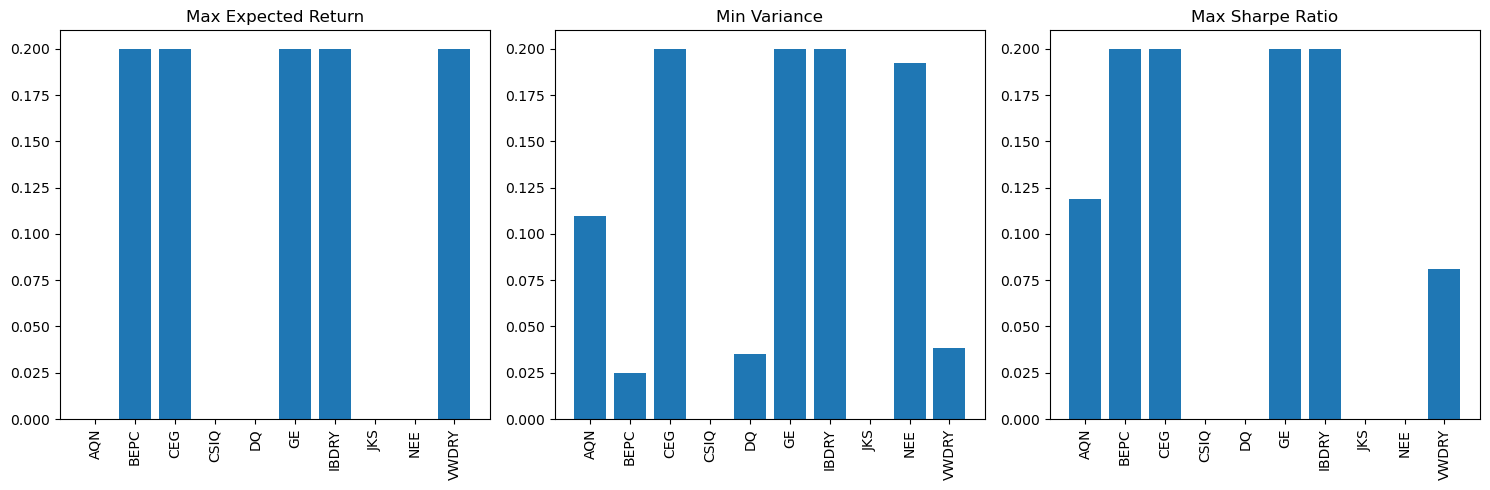

In [5]:
# Auxiliary variables for analysis
log_returns = np.log(adj_close_df / adj_close_df.shift(1)).dropna()
cov_matrix = log_returns.cov()*252

# Optimal portfolio information for max_exp_return
optimal_result_max_exp_return = pto.optimize_portfolio(adj_close_df, min_weight=0.0, max_weight=0.2, method="max_exp_return")
optimal_weights_max_exp_return = optimal_result_max_exp_return.x

# Optimal portfolio information for min_variance
optimal_result_min_variance = pto.optimize_portfolio(adj_close_df, min_weight=0.0, max_weight=0.2, method="min_variance")
optimal_weights_min_variance = optimal_result_min_variance.x

# Optimal portfolio information for max_sharpe
optimal_result_max_sharpe = pto.optimize_portfolio(adj_close_df, min_weight=0.0, max_weight=0.2, method="max_sharpe")
optimal_weights_max_sharpe = optimal_result_max_sharpe.x

# variance, expected return and Sharpe Ratio for each method

# Max. Expected return
max_exp_return = -pto.neg_expected_return(optimal_weights_max_exp_return, log_returns = log_returns)
max_exp_volatility = pto.standard_deviation(optimal_weights_max_exp_return, cov_matrix)
max_exp_sharpe = (-1)*pto.neg_sharpe_ratio(optimal_weights_max_exp_return, log_returns, cov_matrix, 0.02)

# Min. Variance
min_vol_return = -pto.neg_expected_return(optimal_weights_min_variance, log_returns = log_returns)
min_vol_volatility = pto.standard_deviation(optimal_weights_min_variance, cov_matrix)
min_vol_sharpe = (-1)*pto.neg_sharpe_ratio(optimal_weights_min_variance, log_returns, cov_matrix, 0.02)

# Max. Sharpe Ratio
max_sharpe_return = -pto.neg_expected_return(optimal_weights_max_sharpe, log_returns = log_returns)
max_sharpe_vol = pto.standard_deviation(optimal_weights_max_sharpe, cov_matrix)
max_sharpe_sharpe = (-1)*pto.neg_sharpe_ratio(optimal_weights_max_sharpe, log_returns, cov_matrix, 0.02)

# show the portfolio information for each:
print("Maxmimum Expected Return Method:")
print(f"Expected Annual Return: {max_exp_return:.4f}")
print(f"Expected Volatility: {max_exp_volatility:.4f}")
print(f"Sharpe Ratio: {max_exp_sharpe:.4f}")

print("Minimum Variance Method:")
print(f"Expected Annual Return: {min_vol_return:.4f}")
print(f"Expected Volatility: {min_vol_volatility:.4f}")
print(f"Sharpe Ratio: {min_vol_sharpe:.4f}")

print("Maximum Sharpe Ratio Method:")
print(f"Expected Annual Return: {max_sharpe_return:.4f}")
print(f"Expected Volatility: {max_sharpe_vol:.4f}")
print(f"Sharpe Ratio: {max_sharpe_sharpe:.4f}")

fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Plot for max_exp_return
axs[0].bar(tickers, optimal_weights_max_exp_return)
axs[0].set_title('Max Expected Return')
axs[0].tick_params(axis='x', rotation=90)

# Plot for min_variance
axs[1].bar(tickers, optimal_weights_min_variance)
axs[1].set_title('Min Variance')
axs[1].tick_params(axis='x', rotation=90)

# Plot for max_sharpe
axs[2].bar(tickers, optimal_weights_max_sharpe)
axs[2].set_title('Max Sharpe Ratio')
axs[2].tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()

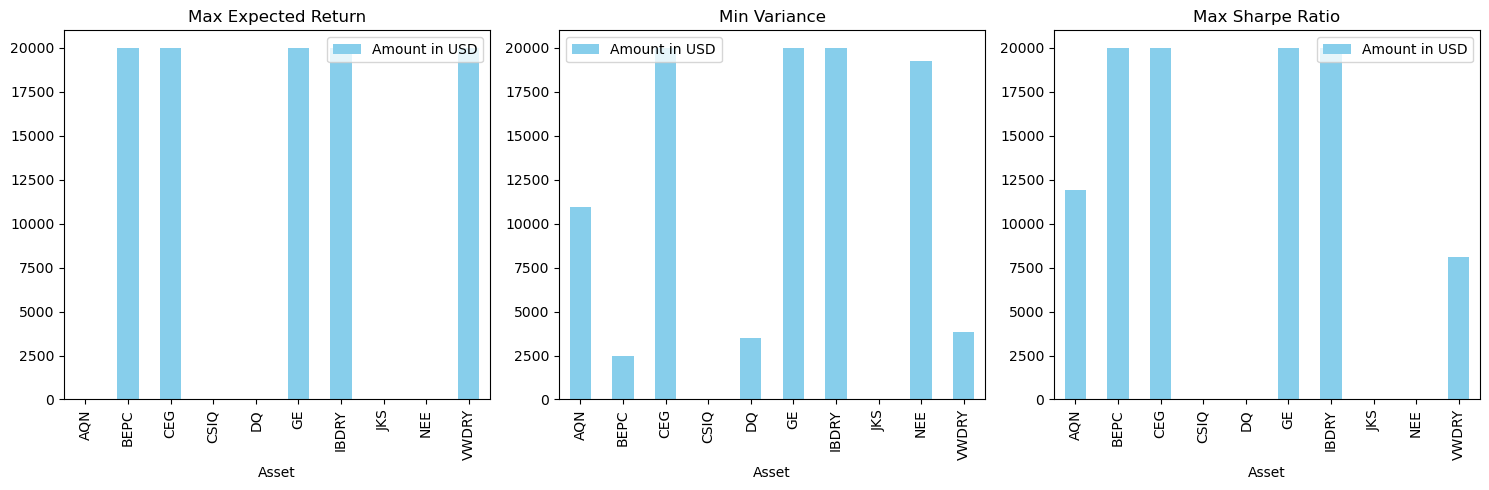

In [6]:
# Portfolio dataframe for max_exp
positions_max_exp = np.round(optimal_result_max_exp_return.x*float(invested_amount))
portfolio_max_exp = pd.DataFrame({'Asset': tickers, 'Amount in USD': positions_max_exp})

# Portfolio dataframe for min_variance
positions_min_variance = np.round(optimal_result_min_variance.x * float(invested_amount))
portfolio_min_variance = pd.DataFrame({'Asset': tickers, 'Amount in USD': positions_min_variance})

# Portfolio dataframe for max_sharpe
positions_max_sharpe = np.round(optimal_result_max_sharpe.x * float(invested_amount))
portfolio_max_sharpe = pd.DataFrame({'Asset': tickers, 'Amount in USD': positions_max_sharpe})

# Displaying portfolio breakdowns side by side
fig, axs = plt.subplots(1, 3, figsize=(15, 5))  # 1 row, 3 columns

# Plot for max_exp_return
portfolio_max_exp.plot(x='Asset', y='Amount in USD', kind='bar', color='skyblue', ax=axs[0])
axs[0].set_title('Max Expected Return')

# Plot for min_variance
portfolio_min_variance.plot(x='Asset', y='Amount in USD', kind='bar', color='skyblue', ax=axs[1])
axs[1].set_title('Min Variance')

# Plot for max_sharpe
portfolio_max_sharpe.plot(x='Asset', y='Amount in USD', kind='bar', color='skyblue', ax=axs[2])
axs[2].set_title('Max Sharpe Ratio')

# Adjust layout
plt.tight_layout()

plt.show()

This is the end of the analysis, here we aim to  make monte carlo simulations of the  evolution of selected combinations of stocks.

In [7]:
print(optimal_result_max_exp_return.x* float(invested_amount))
print(optimal_result_min_variance.x* float(invested_amount))
print(optimal_result_max_sharpe.x* float(invested_amount))

[3.40005801e-11 2.00000000e+04 2.00000000e+04 4.30211422e-11
 2.10421958e-10 2.00000000e+04 2.00000000e+04 1.64365049e-10
 1.04864034e-10 2.00000000e+04]
[1.09782285e+04 2.47419569e+03 2.00000000e+04 0.00000000e+00
 3.49472308e+03 2.00000000e+04 2.00000000e+04 8.73460375e-13
 1.92405948e+04 3.81225787e+03]
[1.18921377e+04 2.00000000e+04 2.00000000e+04 8.48120733e-07
 8.81971232e-07 2.00000000e+04 2.00000000e+04 8.92099117e-07
 6.71124007e-07 8.10786231e+03]


### Theoretical portfolio 
Following lines of code assume you are buying the stocks at the beginning of the period based on the adjusted close prices of the stocks on the first day of your historical data set. This approach provides a straightforward way to understand how the portfolio would have performed historically given the initial weights calculated by our optimization methods

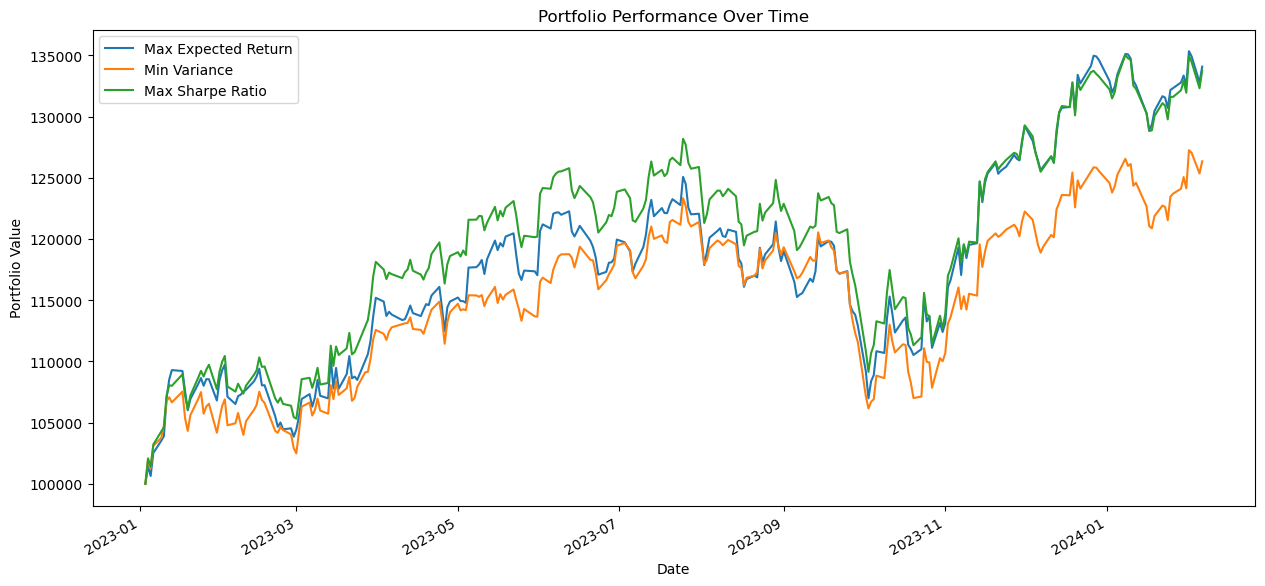

In [8]:
# Calculate the number of shares for each stock in the portfolio for each strategy
shares_max_exp_return = optimal_weights_max_exp_return * invested_amount / adj_close_df.iloc[0]
shares_min_variance = optimal_weights_min_variance * invested_amount / adj_close_df.iloc[0]
shares_max_sharpe = optimal_weights_max_sharpe * invested_amount / adj_close_df.iloc[0]

# Calculate the portfolio value over time for each strategy
portfolio_value_max_exp_return = (adj_close_df * shares_max_exp_return).sum(axis=1)
portfolio_value_min_variance = (adj_close_df * shares_min_variance).sum(axis=1)
portfolio_value_max_sharpe = (adj_close_df * shares_max_sharpe).sum(axis=1)

# Plot the portfolio values over time
plt.figure(figsize=(15, 7))
portfolio_value_max_exp_return.plot(label='Max Expected Return')
portfolio_value_min_variance.plot(label='Min Variance')
portfolio_value_max_sharpe.plot(label='Max Sharpe Ratio')
plt.title('Portfolio Performance Over Time')
plt.xlabel('Date')
plt.ylabel('Portfolio Value')
plt.legend()
plt.show()


### Monte Carlo simulations

This script simulates the future value of your portfolio under each optimization strategy using Monte Carlo simulations. It assumes that the daily returns of the stocks are normally distributed and uses the historical mean and covariance of the log returns as parameters for the simulation. The final histogram plots show the distribution of the simulated portfolio values at the end of the simulation period, providing insight into the range of potential outcomes for each strategy.

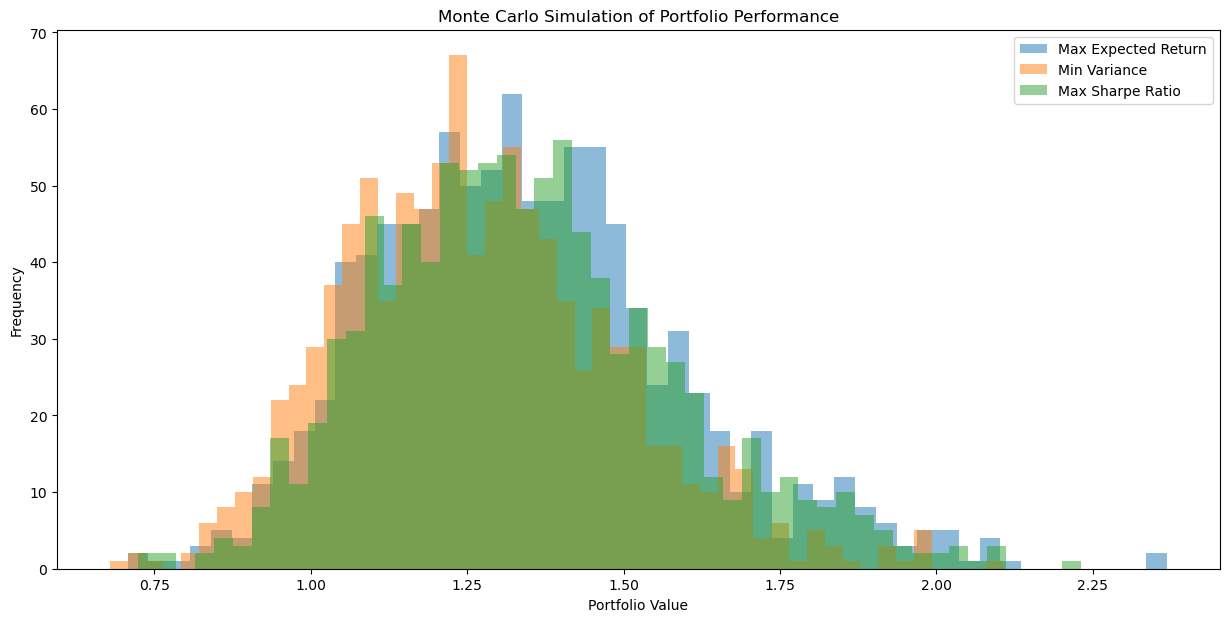

In [9]:
# Parameters
n_simulations = 1000  # Number of Monte Carlo simulations
n_days = 252  # Number of trading days in the future (e.g., 1 year)

# Historical log returns mean and covariance
mean_returns = log_returns.mean()
cov_matrix = log_returns.cov()

# Initialize arrays to store simulation results
simulated_portfolios_max_exp_return = np.zeros((n_simulations, n_days))
simulated_portfolios_min_variance = np.zeros((n_simulations, n_days))
simulated_portfolios_max_sharpe = np.zeros((n_simulations, n_days))

for i in range(n_simulations):
    # Generate random price paths for each stock
    daily_returns = np.random.multivariate_normal(mean_returns, cov_matrix, n_days)
    
    # Calculate the price paths
    price_paths = np.exp(daily_returns.cumsum(axis=0))
    
    # Calculate portfolio value for each strategy
    simulated_portfolios_max_exp_return[i, :] = (price_paths * optimal_weights_max_exp_return).sum(axis=1)
    simulated_portfolios_min_variance[i, :] = (price_paths * optimal_weights_min_variance).sum(axis=1)
    simulated_portfolios_max_sharpe[i, :] = (price_paths * optimal_weights_max_sharpe).sum(axis=1)

# Plotting the last day distribution for each strategy
plt.figure(figsize=(15, 7))

plt.hist(simulated_portfolios_max_exp_return[:, -1], bins=50, alpha=0.5, label='Max Expected Return')
plt.hist(simulated_portfolios_min_variance[:, -1], bins=50, alpha=0.5, label='Min Variance')
plt.hist(simulated_portfolios_max_sharpe[:, -1], bins=50, alpha=0.5, label='Max Sharpe Ratio')

plt.title('Monte Carlo Simulation of Portfolio Performance')
plt.xlabel('Portfolio Value')
plt.ylabel('Frequency')
plt.legend()
plt.show()

### More visualisations of the MC Simulations

In [2]:
sns.set(style='whitegrid')

# 1. Average Portfolio Value Over Time
plt.figure(figsize=(10, 5))
plt.plot(simulated_portfolios_max_exp_return.mean(axis=0), label='Max Expected Return - Mean')
plt.plot(simulated_portfolios_min_variance.mean(axis=0), label='Min Variance - Mean')
plt.plot(simulated_portfolios_max_sharpe.mean(axis=0), label='Max Sharpe Ratio - Mean')
plt.title('Average Portfolio Value Over Time')
plt.xlabel('Days')
plt.ylabel('Average Portfolio Value')
plt.legend()
plt.show()

# 2. Percentile Bands of Portfolio Value
plt.figure(figsize=(15, 7))
for strategy, label in zip([simulated_portfolios_max_exp_return, simulated_portfolios_min_variance, simulated_portfolios_max_sharpe], 
                           ['Max Expected Return', 'Min Variance', 'Max Sharpe Ratio']):
    upper_band = np.percentile(strategy, 90, axis=0)
    lower_band = np.percentile(strategy, 10, axis=0)
    plt.fill_between(range(n_days), lower_band, upper_band, alpha=0.1)
    plt.plot(strategy.mean(axis=0), label=label + ' - Mean')
plt.title('Portfolio Value Percentile Bands Over Time')
plt.xlabel('Days')
plt.ylabel('Portfolio Value')
plt.legend()
plt.show()

# 3. Final Portfolio Value Distribution with KDE
plt.figure(figsize=(15, 7))
sns.kdeplot(simulated_portfolios_max_exp_return[:, -1], label='Max Expected Return', fill=True)
sns.kdeplot(simulated_portfolios_min_variance[:, -1], label='Min Variance', fill=True)
sns.kdeplot(simulated_portfolios_max_sharpe[:, -1], label='Max Sharpe Ratio', fill=True)
plt.title('Final Portfolio Value Distribution')
plt.xlabel('Portfolio Value')
plt.ylabel('Density')
plt.legend()
plt.show()

# 4. Overlay of Sample Paths
plt.figure(figsize=(15, 7))
for i in range(10):  # Plot 10 sample paths from each strategy
    plt.plot(simulated_portfolios_max_exp_return[i, :], 'r', alpha=0.3)
    plt.plot(simulated_portfolios_min_variance[i, :], 'g', alpha=0.3)
    plt.plot(simulated_portfolios_max_sharpe[i, :], 'b', alpha=0.3)
plt.title('Sample Paths of Portfolio Value Over Time')
plt.xlabel('Days')
plt.ylabel('Portfolio Value')
plt.show()

NameError: name 'simulated_portfolios_max_exp_return' is not defined

<Figure size 1000x500 with 0 Axes>

end of code